In [1]:
import h5py
import numpy as np
import os

In [2]:
import matplotlib.pyplot as plt

In [3]:
import trove.build

# Parameters

In [4]:
pm = trove.build.link_params_to_config(
    config_fp = './tests/examples/midway/midway.trove',
)

# Load Data

In [5]:
pre_fp = os.path.join( pm['used_data_dir'], 'pre.hdf5' )
pre = h5py.File( pre_fp, 'r' )

In [6]:
main_fp = os.path.join( pm['used_data_dir'], 'main.hdf5' )
main = h5py.File( pre_fp, 'r' )

# Analysis

We'd like to compare the distribution of last digits pre- and post-raised to a power.

In [7]:
rounded = np.floor( pre['numbers'][...] )

In [8]:
rounded_raised = np.floor( main['numbers'][...] )

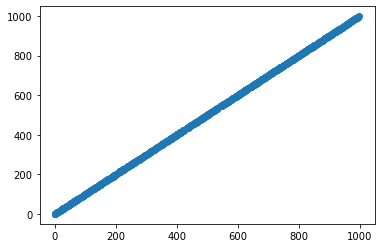

In [9]:
plt.scatter(
    rounded,
    rounded_raised
)

In [10]:
last = np.array([ _[-1] for _ in rounded.astype( int ).astype( str ) ]).astype( int )
last_raised = np.array([ _[-1] for _ in rounded_raised.astype( int ).astype( str ) ]).astype( int )

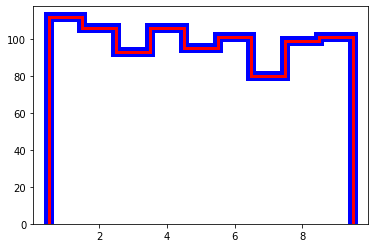

In [11]:
fig = plt.figure()
ax = plt.gca()

_ = ax.hist(
    last,
    bins = np.linspace( 0.5, 9.5, 10 ),
    histtype = 'step',
    linewidth = 10,
    color = 'b',
)

_ = ax.hist(
    last_raised,
    bins = np.linspace( 0.5, 9.5, 10 ),
    histtype = 'step',
    linewidth = 3,
    color = 'r',
)

os.makedirs( pm['figure_dir'], exist_ok=True )
savefile = os.path.join( pm['figure_dir'], 'last_digits_{}.pdf'.format( os.path.basename( pm['used_data_dir'] ) ) )
plt.savefig( savefile, bbox_inches='tight' )